# Example of [dwdatareader](https://pypi.org/project/dwdatareader/) inside a Jupyter notebook

## Examples of reading data

In [1]:
import dwdatareader as dw
print(dw.__version__, dw.get_version())

1.0.0 5.0.0


### Option 1: Read entire file into Pandas Dataframe
Warning: May be *huge*

In [2]:
with dw.open_file('Example_Drive01.d7d') as d7d:
    print(d7d.info)
    channels = [channel for channel in d7d
                if not 'CAN' in d7d[channel].channel_index] # workaround CAN bug
    df = d7d.dataframe(channels) # all channels by default
df

100.0 Hz | 2003-10-09 21:27:46.812004+00:00 | 2003-10-09 21:27:46.812004+00:00 | 95.8 s


,GPSvel,Math 0,X absolute,Y absolute,Velocity,Direction,Used sattelites,CNT 0
0.00,89.257812,0.0,NaN,NaN,NaN,NaN,NaN,0.248333
0.01,89.263916,0.0,NaN,NaN,NaN,NaN,NaN,0.496389
0.02,89.270020,0.0,NaN,NaN,NaN,NaN,NaN,0.744722
0.03,89.282227,0.0,NaN,NaN,NaN,NaN,NaN,0.993056
0.04,89.263916,0.0,NaN,NaN,NaN,NaN,NaN,1.241389
...,...,...,...,...,...,...,...,...
95.75,-0.079346,0.0,NaN,NaN,NaN,NaN,NaN,1891.475879
95.76,-0.079346,0.0,NaN,NaN,NaN,NaN,NaN,1891.475879
95.77,-0.073242,0.0,NaN,NaN,NaN,NaN,NaN,1891.475879
95.78,-0.085449,0.0,NaN,NaN,NaN,NaN,NaN,1891.475879


The above dataframe includes uneven time intervals and a lot of NaN due to the different sampling rates for some channels.
The following is one way to regularize the dataframe using the index from a single channel using Pandas mehods:

In [3]:
newIndex = df.index[df['GPSvel'].notna()]
df2 = df.bfill().ffill().reindex(index=newIndex)
df2

,GPSvel,Math 0,X absolute,Y absolute,Velocity,Direction,Used sattelites,CNT 0
0.00,89.257812,0.0,497.3444,2728.4121,85.179039,233.500000,8.0,0.248333
0.01,89.263916,0.0,497.3444,2728.4121,85.179039,233.500000,8.0,0.496389
0.02,89.270020,0.0,497.3444,2728.4121,85.179039,233.500000,8.0,0.744722
0.03,89.282227,0.0,497.3444,2728.4121,85.179039,233.500000,8.0,0.993056
0.04,89.263916,0.0,497.3444,2728.4121,85.179039,233.500000,8.0,1.241389
...,...,...,...,...,...,...,...,...
95.75,-0.079346,0.0,497.7526,2728.7605,0.583380,204.199997,8.0,1891.475879
95.76,-0.079346,0.0,497.7526,2728.7605,0.583380,204.199997,8.0,1891.475879
95.77,-0.073242,0.0,497.7526,2728.7605,0.583380,204.199997,8.0,1891.475879
95.78,-0.085449,0.0,497.7526,2728.7605,0.583380,204.199997,8.0,1891.475879


<Axes: >

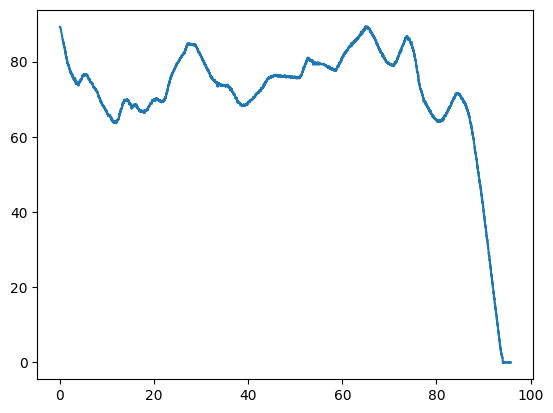

In [4]:
# Plot a channel
df['GPSvel'].plot()

### Option 2: Operate on chunks of a specific channel to minimize memory requirement

In [5]:
with dw.open_file('Example_Drive01.d7d') as d7d:
    ch = d7d['GPSvel']
    print('Channel:', ch)
    print(ch.number_of_samples, 'total samples')
    for ds in ch.series_generator(chunk_size=2000):
        print(ds.index[0], 's,', len(ds), 'samples, mean velocity', ds.mean(), ch.unit)

Channel: GPSvel (kph) v
9580 total samples
0.0 s, 2000 samples, mean velocity 71.3724578857422 kph
20.0 s, 2000 samples, mean velocity 75.65996704101562 kph
40.0 s, 2000 samples, mean velocity 76.49486999511718 kph
60.0 s, 2000 samples, mean velocity 80.88096313476562 kph
80.0 s, 1580 samples, mean velocity 45.3124150143394 kph
